## Load files

In [ ]:
pf00959 = './downloads/PF00959.fasta'
pf00048 = './downloads/PF00048.fasta'
pf00056 = './downloads/PF00056.fasta'

## Util

In [16]:
from collections import Counter
def get_most_k_common_n_letter_seq_prefix(fasta_file, n, k):
    with open(fasta_file, 'r') as file:
        prefixes = Counter()
        for line in file:
            if line.startswith('>'):
                continue
            prefix = line[0:n]
            prefixes[prefix] += 1
    return prefixes.most_common(k)

In [17]:
def count_sequences_in_fasta(fasta_file):
    with open(fasta_file, 'r') as file:
        sequences = 0
        for line in file:
            if line.startswith('>'):
                sequences += 1
    return sequences

'''
>A0A177G777|PF00959(13...73)|Lysozyme
MLLLPMFDGAGGSAVLDWQFNLGTSAVASSTLIRLLNSGQDIAAGEQLLLWDHAHKDGHLITLPGLTVRRHAEWLVYTGA
TRGHVPAAPPPSSPPSTITTDQLNSNELSRVKESA
'''


def get_mean_seq_len(fasta_file):
    with open(fasta_file, 'r') as file:
        seq_lens = []
        for line in file:
            if line.startswith('>'):
                continue
            seq_lens.append(len(line.strip()))
    return sum(seq_lens) / len(seq_lens)


### Pre-processing

In [ ]:
def remove_duplicates_and_rewrite_fasta(fasta_file):
    with open(fasta_file, 'r') as file:
        lines = file.readlines()

    sequences = {}
    header = None

    for line in lines:
        if line.startswith('>'):
            header = line.strip()
        else:
            sequence = line.strip()
            if sequence not in sequences:
                sequences[sequence] = header
    print(f"Original number of sequences: {len(lines) // 2}")
    print(f"Number of sequences after removing duplicates: {len(sequences)}")
    # with open(fasta_file, 'w') as file:
    #     for sequence, header in sequences.items():
    #         file.write(f"{header}\n{sequence}\n")

remove_duplicates_and_rewrite_fasta(pf00959)
remove_duplicates_and_rewrite_fasta(pf00048)
remove_duplicates_and_rewrite_fasta(pf00056)

Original number of sequences: 16895
Number of sequences after removing duplicates: 16895
Original number of sequences: 22455
Number of sequences after removing duplicates: 22455
Original number of sequences: 67941
Number of sequences after removing duplicates: 67941


### Plotting

In [21]:
import matplotlib.pyplot as plt

# plot the distribution of sequence lengths
def plot_seq_len_dist(fasta_file):
    with open(fasta_file, 'r') as file:
        seq_lens = []
        for line in file:
            if line.startswith('>'):
                continue
            seq_lens.append(len(line.strip()))

    plt.hist(seq_lens, bins=20)
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sequence Lengths in {fasta_file}')
    plt.show()

### Group

In [47]:
def print_insights(pfam_file, num_sequences, mean_len, most_common_3):
    print(f'Number of sequences in {pfam_file}: {num_sequences}')
    print(f'Mean sequence length in {pfam_file}: {mean_len}')
    print(f'Top prefixes in {pfam_file}: {most_common_3}')

## Show all

In [48]:
num_sequences_pf00959 = count_sequences_in_fasta(pf00959)
num_sequences_pf00048 = count_sequences_in_fasta(pf00048)
num_sequences_pf00056 = count_sequences_in_fasta(pf00056)
mean_len_pf00959 = get_mean_seq_len(pf00959)
mean_len_pf00048 = get_mean_seq_len(pf00048)
mean_len_pf00056 = get_mean_seq_len(pf00056)
most_common_3_pf00959 = get_most_k_common_n_letter_seq_prefix(pf00959, 5, 5)
most_common_3_pf00048 = get_most_k_common_n_letter_seq_prefix(pf00048, 5, 5)
most_common_3_pf00056 = get_most_k_common_n_letter_seq_prefix(pf00056, 5, 5)


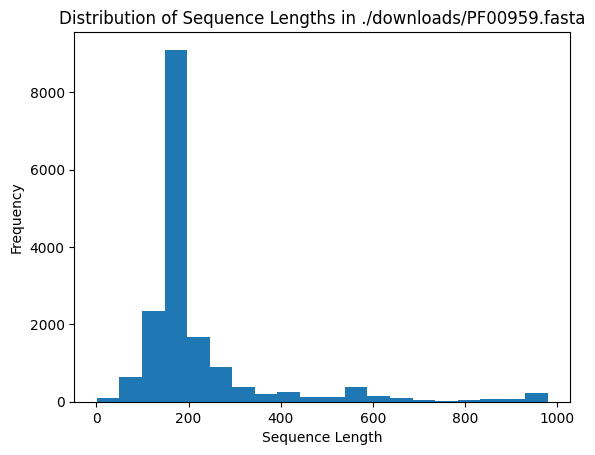

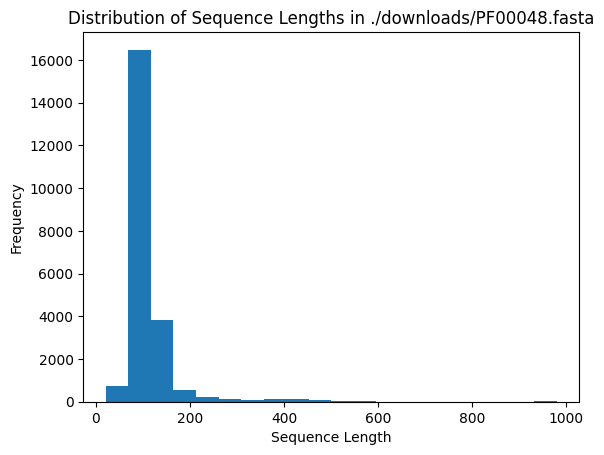

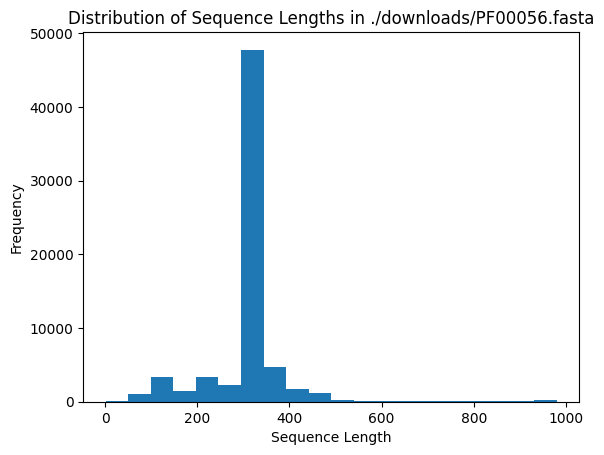

Number of sequences in ./downloads/PF00959.fasta: 16895
Mean sequence length in ./downloads/PF00959.fasta: 219.12536253329387
Top prefixes in ./downloads/PF00959.fasta: [('MEMIS', 162), ('MNPSI', 147), ('MALRT', 138), ('MSPAL', 125), ('MNAKI', 117)]
Number of sequences in ./downloads/PF00048.fasta: 22455
Mean sequence length in ./downloads/PF00048.fasta: 113.58000445335115
Top prefixes in ./downloads/PF00048.fasta: [('MKVSA', 545), ('MKVSV', 279), ('MNGKL', 202), ('DMKVS', 145), ('AILEV', 141)]
Number of sequences in ./downloads/PF00056.fasta: 67941
Mean sequence length in ./downloads/PF00056.fasta: 309.68790568287193
Top prefixes in ./downloads/PF00056.fasta: [('LEGVV', 1615), ('MKVTV', 1577), ('MKVAV', 1501), ('MARKK', 1381), ('MTRTP', 916)]


In [49]:
plot_seq_len_dist(pf00959)
plot_seq_len_dist(pf00048)
plot_seq_len_dist(pf00056)
print_insights(pf00959, num_sequences_pf00959, mean_len_pf00959, most_common_3_pf00959)
print_insights(pf00048, num_sequences_pf00048, mean_len_pf00048, most_common_3_pf00048)
print_insights(pf00056, num_sequences_pf00056, mean_len_pf00056, most_common_3_pf00056)